<h1>Geometrical algorithms</h1>

<h1> Basics </h1>

<ul>

<li>Point: $(x,y)$</li>

<li>Line: $ax + b =y$</li>

<li>Line segment: Two points</li>

<li>Polygon: Sequence of points.</li>
</ul>

<h2> Points and Line Segments</h2>

What is the length of a line segment $S_i$?

In [31]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [28]:
def length_segment(p1,p2):
    return ((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**.5

P1 = [0.,0.]
P2 = [3.,4.]
print 'Length(P1,P2) = ', length_segment(P1, P2)
#np.linalg.norm([P1, P2])

Length(P1,P2) =  5.0


What is the midpoint of a line segment $S_i$?

In [29]:
def midpoint_segment(p1,p2):
    return [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]

P3 = [2.,-1.]
P4 = [-1.,5.]
print 'Length(P1,P2) = ', midpoint_segment(P3, P4)

Length(P1,P2) =  [0.5, 2.0]


What is the intersection between two line segments $S_i$ and $S_j$?

Is a given point $P$ contained in the line segment $S$?

CCW. Given three points a, b, and c, are the segments $\bar{ab}$, $\bar{bc}$ a counterclockwise turn?

<h3>Cross product</h3>

Consider vectors $p_1$ and $p_2$, cross product can be interpreted as the area of the parallelogram formed by the points $(0,0)$, $p_1$, $p_2$, and $p_1 + p_2$. An equivalent defintion of cross product is a determinant:

\begin{align}
p_1 \times p2 & = &det(\begin{matrix}x_1 & x_2\\ y_1 & y_2\end{matrix})\\
  & = &x_1y_2 - x_2y_1\\
  & = &-p_2\times p_1
\end{align}

<ul>
<li>If $p_1\times p_2 > 0$, then $ p_1$ is clockwise from $p_2$ respect to the origin $(0,0)$</li>
<li>If $p_1\times p_2 < 0$, then $ p_1$ is counterclockwise from $p_2$ respect to the origin $(0,0)$</li>
<li>If $p_1\times p_2 = 0$, then $ p_1$ and $p_2$ are colinear</li>
</ul>

To determine if a directed segment $\bar{p_0p_1}$ is closer to a directed segment $\bar{p_0p2}$ in a clockwise direction we use $p_0$ as the origin. i.e. $p_1-p_0$, $p_2-p_0$, hence the cross product can be computed as

$$ (p_1 - p_0) \times (p_2 - p_0) = (x_1-x_0)(y_1-y0) \times (x_2-x_0)(y_2-y0)$$

To determine whether two consecutive line segments $\bar{p_0 p_1}$ and $\bar{p_1 p_2}$ turn counterclockwise at point $p_1$ or not, we simply check whether directed segment $\bar{p_0 p_2}$ is clockwise or counterclockwise relative to directed segment $\bar{p_0 p_1}$. To do so, we compute the cross product $\bar{p_2 p_0} \times \bar{p_1 p_0}$. If the sign of this cross product is negative, then $\bar{p_0p_2}$ is counterclockwise with respect to $\bar{p_0 p_1}$ and thus we make a left turn at $p_1$. A positive cross product indicates a clockwise orientation and a right turn. A cross product of $0$ means that points $p_0$ , $p_1$ , and $p_2$ are colinear.


In [45]:
print P1,P2
print np.arange(P1[0],P2[0],.1).shape
print np.arange(P1[1],P2[1],.1).shape

[0.0, 0.0] [3.0, 4.0]
(30,)
(40,)


(-1, 6)

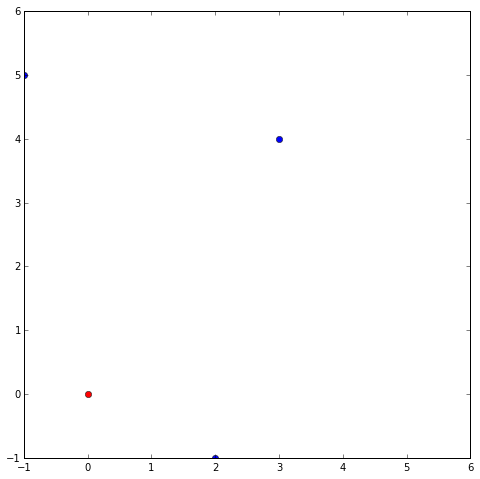

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(P1[0],P1[1],'ro')
plt.plot(P2[0],P2[1],'bo')
plt.plot(P3[0],P3[1],'bo')
plt.plot(P4[0],P4[1],'bo')
plt.xlim(-1., 6)
plt.ylim(-1., 6)

In [1]:
from sympy.geometry import *

In [25]:
P1 = Point(0, 0)
P2 = Point(3, 4)
P3 = Point(2, -1)
P4 = Point(-1, 5)
S1 = Segment(P1, P2)
S2 = Segment(P3, P4)

In [26]:
print Point.is_collinear(P1, P2, P3)
print S1.length
print S2.midpoint
print S1.slope
print S1.intersection(S2)
print Segment.angle_between(S1, S2)
print S1.contains(P3)

False
5
Point(1/2, 2)
4/3
[Point(9/10, 6/5)]
acos(-sqrt(5)/5)
False


<h2>Lines</h2>

What is the distance from a point $P$ to the line $L$?

What is an ortogonal line $L_i$ which intersect $L_j$ at an arbitrary point?

What is a line $L_i$ parallel to $L_j$ with a distance $d$?

In [27]:
L1 = Line(P1, P2)
L2 = L1.perpendicular_line(P3)        # perpendicular line to L1
print L2.arbitrary_point()            # parametric equation of L2
print L2.equation()                   # algebraic equation of L2
print L2.contains(P4)                 # is P4 in L2?
print L2.distance(P4)                 # distance from P4 to L2
print L1.is_parallel(S2)              # is S2 parallel to L1?


Point(4*t + 2, -3*t - 1)
3*x + 4*y - 2
False
3
False


<h2>Polygons</h2>

Jordan curve theorem (Veblen, 1905): Any continous simple closed curve cuts the plane in exactly two pieces: the inside and the outside.

Activities:
1. Draw polygons.
2. Is a point inside a polygon?

Note: Clustering algorithms might be an interesting and advanced topic to review.

<h1>References</h1>

https://www.cs.princeton.edu/~rs/AlgsDS07/16Geometric.pdf

http://blancosilva.github.io/post/2014/10/28/Computational-Geometry-in-Python.html

http://people.inf.elte.hu/fekete/algoritmusok_msc/terinfo_geom/konyvek/Computational%20Geometry%20-%20Algorithms%20and%20Applications,%203rd%20Ed.pdf